In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
df =pd.read_csv('/content/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


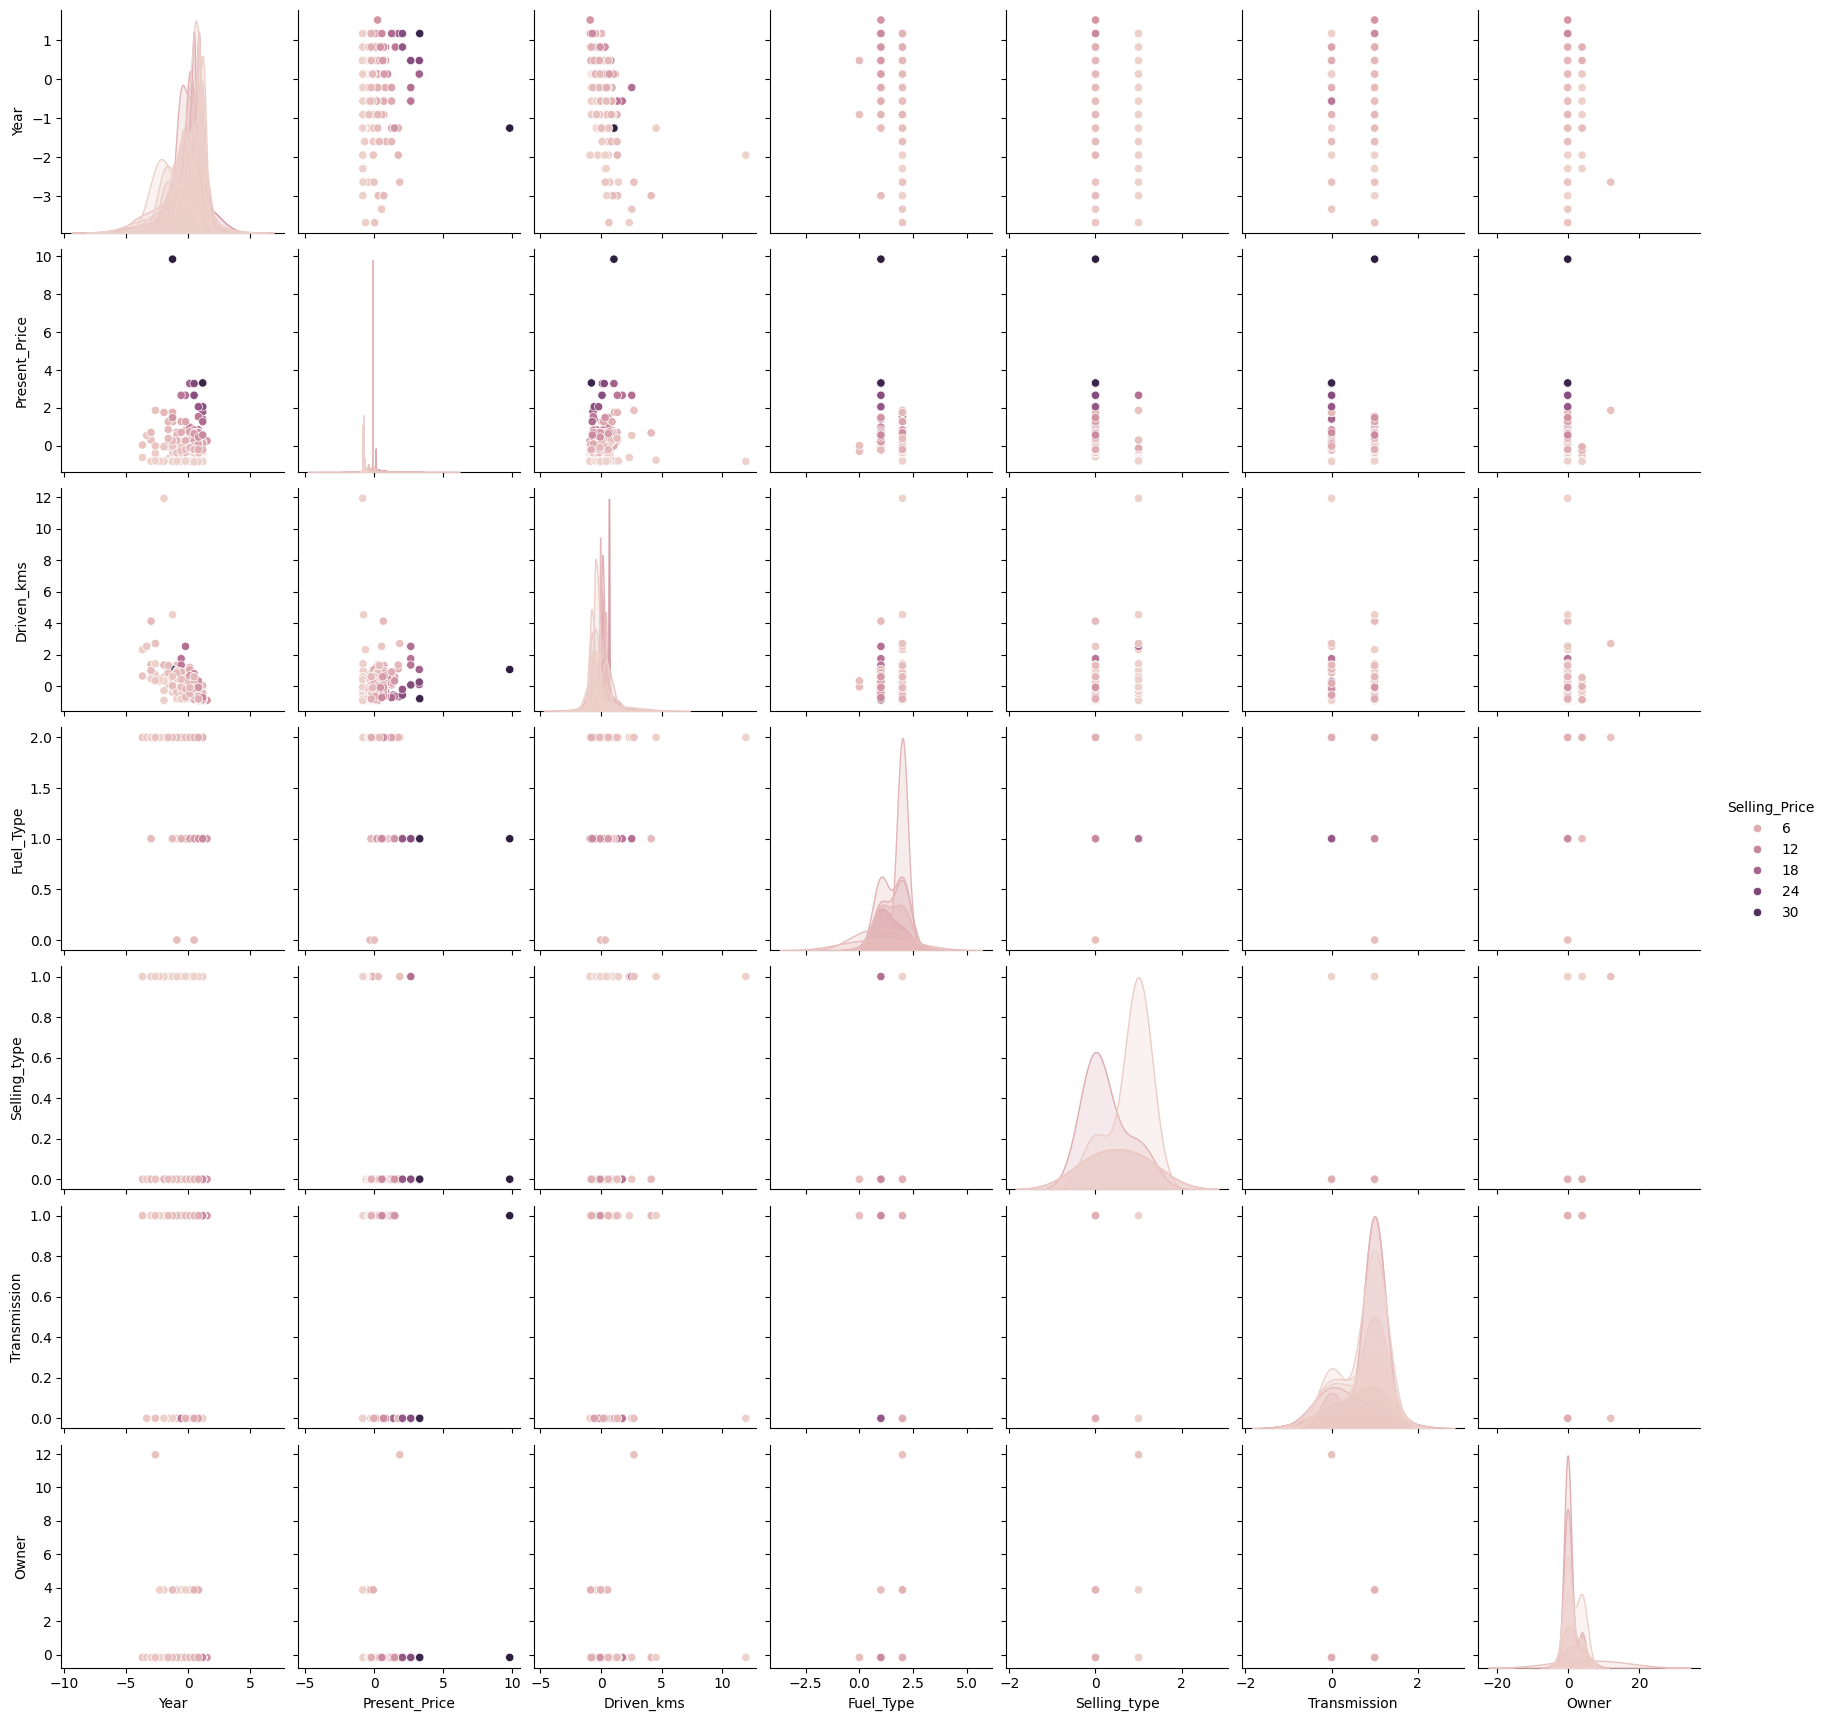

In [ ]:
sns.pairplot(hue='Selling_Price', data = df)

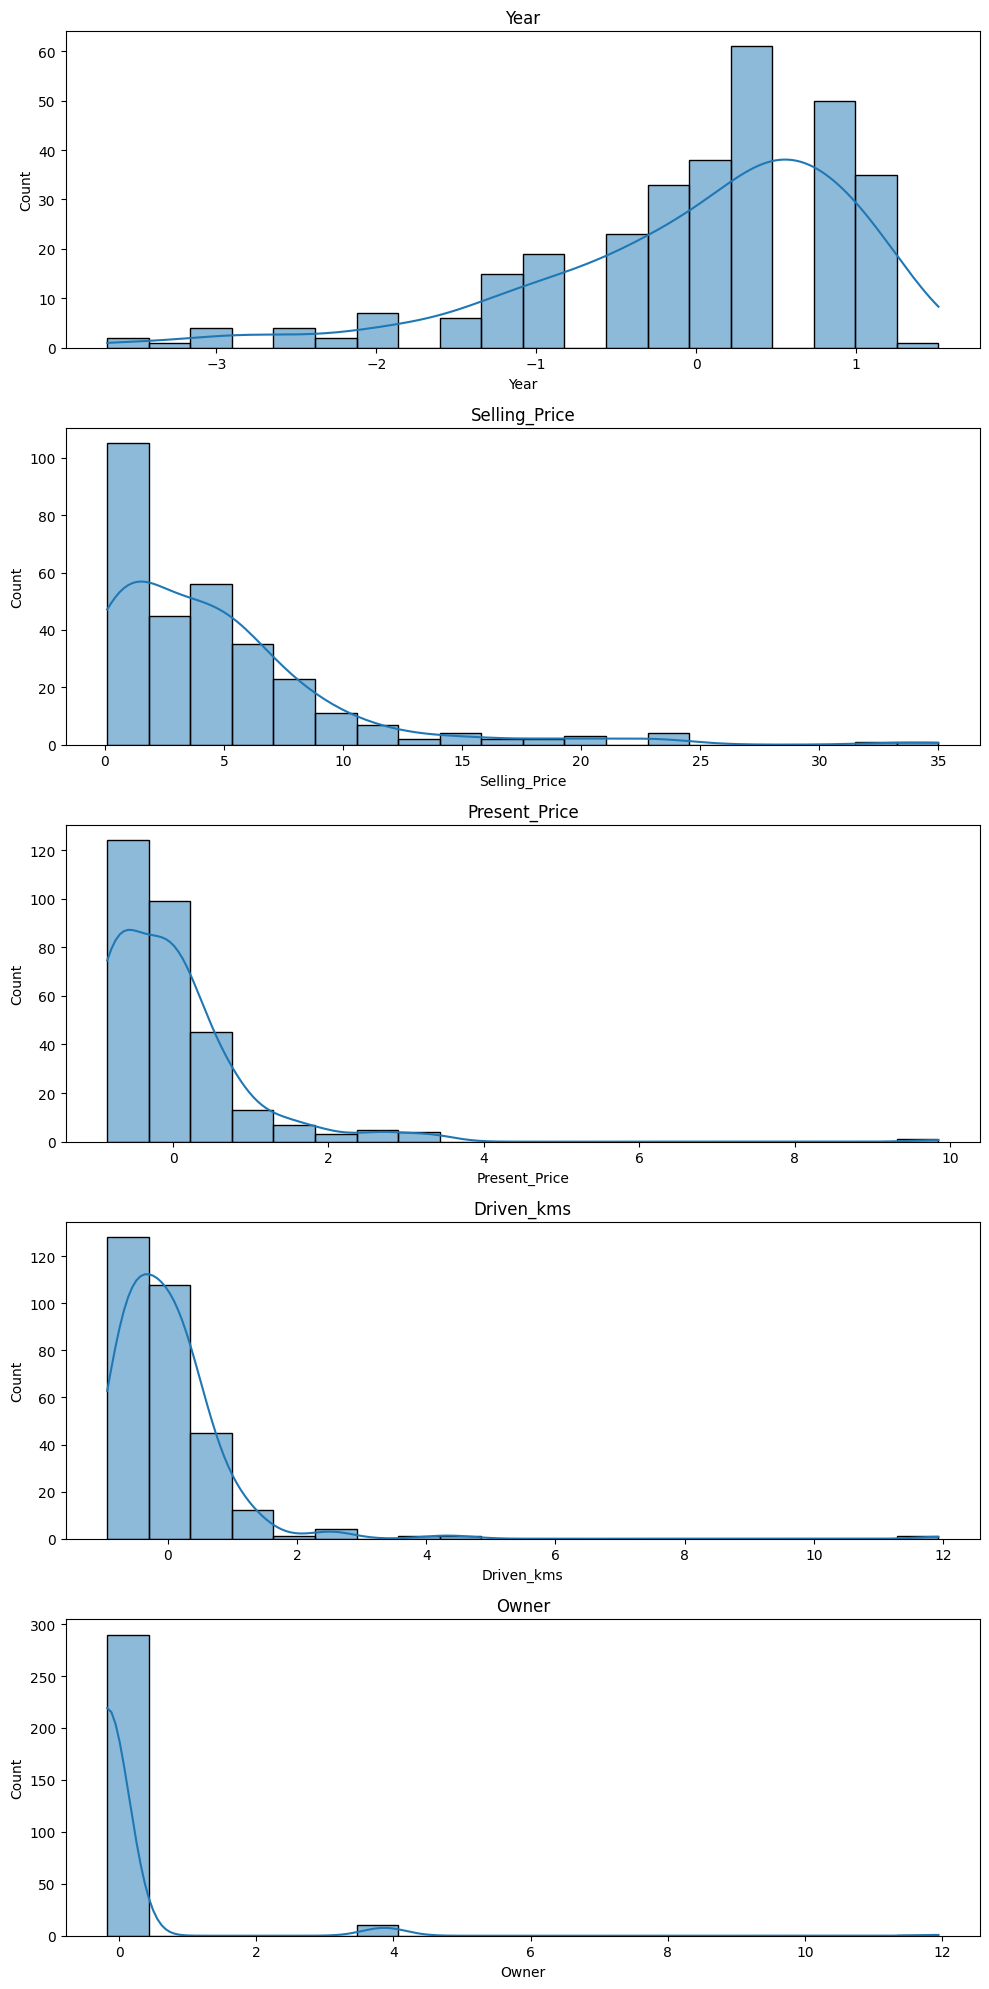

In [ ]:
numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

plt.figure(figsize=(10, 20))
for feature in numerical_features:
    plt.subplot(5, 1, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = ['Fuel_Type','Selling_type','Transmission']

for col in categorical_columns:

    print(f"Category in {col} is : {df[col].unique()}")

Category in Fuel_Type is : [2 1 0]
Category in Selling_type is : [0 1]
Category in Transmission is : [1 0]


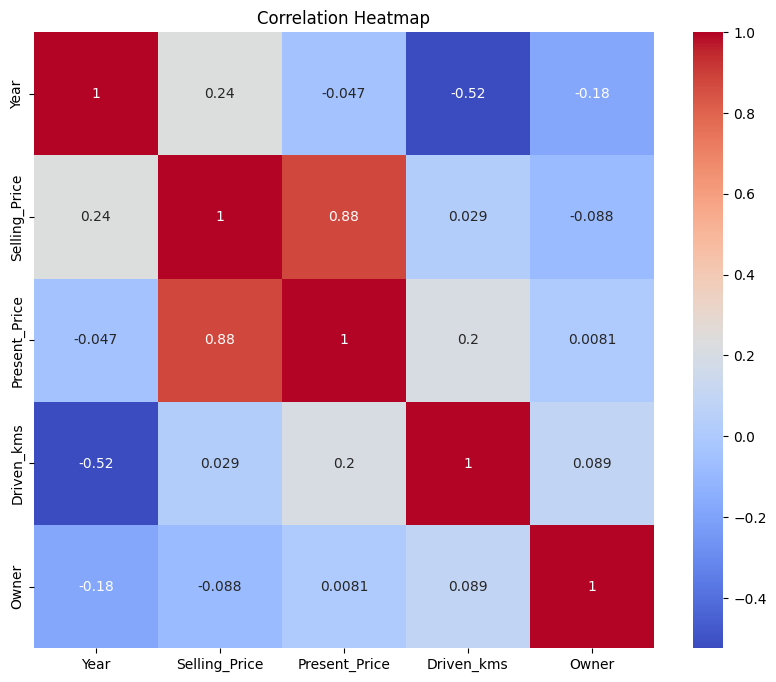

In [ ]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
numerical_columns = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [45]:
x = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # Include the engineered features and CarName
y = df['Selling_Price']
c=df['Car_Name']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(x_train)
r2_square = r2_score(y_train,y_pred)
print(f" R-squared: {r2_square}")

 R-squared: 0.8836563703329277


In [51]:
y_test_pred = model.predict(x_test)
r2_square = r2_score(y_test,y_test_pred)
print(f" R-squared: {r2_square}")

 R-squared: 0.8466902419663817
